In [1]:
#GPUを認識しているか確認
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
#ファイルの読み書きを可能にする
from google.colab import drive
drive.mount('/content/drive')

#ファイルを置いてあるパスを入力
file_path = "/content/drive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
search_word = ["dog","cat"]

import os
import cv2
import numpy as np
from keras.utils.np_utils import to_categorical

#トレーニングデータのラベル付け
x_train = [] #画像データ
y_train = [] #ラベル
for i in range(len(search_word)):
    train_img_list = os.listdir(file_path+"Train/"+search_word[i])
    print("{}:トレーニング用の画像の数は{}枚".format(search_word[i], len(train_img_list)))
    for j in range(len(train_img_list)-1):
        path = os.path.join(file_path+"Train/"+search_word[i]+"/", train_img_list[j])
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #BGRからRGBに変換
        data = np.asarray(img)
        data = data.astype(np.float32) / 255 #画像のピクセル値を0.0～1.0に正規化
        x_train.append(data)
        y_train.append(i)

#テストデータのラベル付け
x_test = []
y_test = []
for i in range(len(search_word)):
    test_img_list = os.listdir(file_path+"Test/"+search_word[i])
    print("{}:テスト用の画像の数は{}枚".format(search_word[i], len(test_img_list)))
    for j in range(len(test_img_list)-1):
        path = os.path.join(file_path+"Test/"+search_word[i]+"/", test_img_list[j])
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data = np.asarray(img)
        data = data.astype(np.float32) / 255
        x_test.append(data)
        y_test.append(i)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = to_categorical(y_train) #ワンホットのベクトルに変換
y_test = to_categorical(y_test) #ワンホットのベクトルに変換

dog:トレーニング用の画像の数は648枚
cat:トレーニング用の画像の数は616枚
dog:テスト用の画像の数は162枚
cat:テスト用の画像の数は155枚


Train on 1262 samples, validate on 315 samples
Epoch 1/25
1262/1262 [==============================] - 6s 5ms/step - loss: 0.9664 - acc: 0.5024 - val_loss: 0.6915 - val_acc: 0.5429
Epoch 2/25
1262/1262 [==============================] - 5s 4ms/step - loss: 0.6951 - acc: 0.5301 - val_loss: 0.6787 - val_acc: 0.5206
Epoch 3/25
1262/1262 [==============================] - 5s 4ms/step - loss: 0.6815 - acc: 0.5705 - val_loss: 0.6696 - val_acc: 0.5270
Epoch 4/25
1262/1262 [==============================] - 5s 4ms/step - loss: 0.6596 - acc: 0.6165 - val_loss: 0.6613 - val_acc: 0.6413
Epoch 5/25
1262/1262 [==============================] - 5s 4ms/step - loss: 0.6424 - acc: 0.6426 - val_loss: 0.6721 - val_acc: 0.5333
Epoch 6/25
1262/1262 [==============================] - 5s 4ms/step - loss: 0.6240 - acc: 0.6648 - val_loss: 0.6577 - val_acc: 0.5619
Epoch 7/25
1262/1262 [==============================] - 5s 4ms/step - loss: 0.5977 - acc: 0.6735 - val_loss: 0.6330 - val_acc: 0.6222
Epoch 8/25
1262

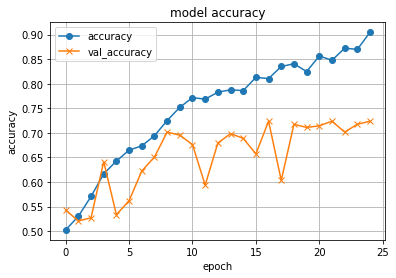

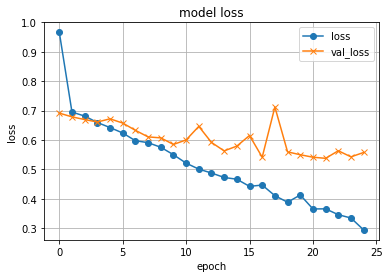

In [7]:
search_word = ["dog","cat"]

from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

#特徴量を取り出す
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:])) #畳み込み層
model.add(Activation("relu")) #活性化関数
model.add(MaxPooling2D(pool_size=(2, 2))) #プーリング層
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#特徴量に基づく分類
model.add(Flatten()) #データの1次元化
model.add(Dense(64)) #全結合層
model.add(Activation("relu"))
model.add(Dropout(0.5)) #ドロップアウト層
model.add(Dense(len(search_word)))
model.add(Activation("softmax"))

#訓練過程の設定
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
#モデルの訓練
history = model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1, validation_data=(x_test, y_test))
#モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print("val_accuracy:{}".format(score[1]))
print("val_loss:{}".format(score[0]))


import matplotlib.pyplot as plt

#正解率のプロット
plt.plot(history.history["acc"], marker="o")
plt.plot(history.history["val_acc"], marker="x")
plt.title("model accuracy") #タイトルの設定
plt.ylabel("accuracy") #y軸ラベル
plt.xlabel("epoch") #x軸ラベル
plt.grid() #グリッドの表示
plt.legend(["accuracy", "val_accuracy"], loc="best") #凡例の表示
plt.savefig(file_path+"Accuracy.jpg") #評価の保存
plt.show()
#損失値のプロット
plt.plot(history.history["loss"], marker="o")
plt.plot(history.history["val_loss"], marker="x")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.grid()
plt.legend(["loss", "val_loss"], loc="best")
plt.savefig(file_path+"Loss.jpg")
plt.show()